In [150]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

# Load Data

In [2]:
boston_dataset = load_boston()

## Inspect Data

In [50]:
print(dir(boston_dataset))
print(boston_dataset.DESCR)

['DESCR', 'data', 'feature_names', 'target']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        

## Load raw data to a data frame

In [52]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [53]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
boston['MEDV'] = boston_dataset.target

In [61]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Pre-process data

In [66]:
# Check for any missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory data analysis

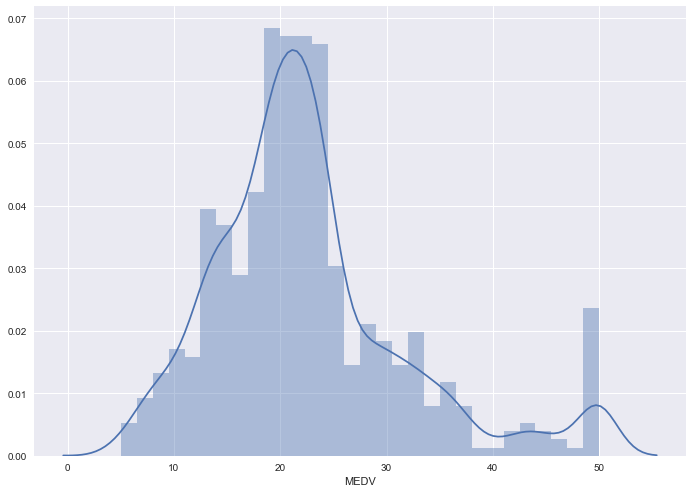

In [71]:
# Plot target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

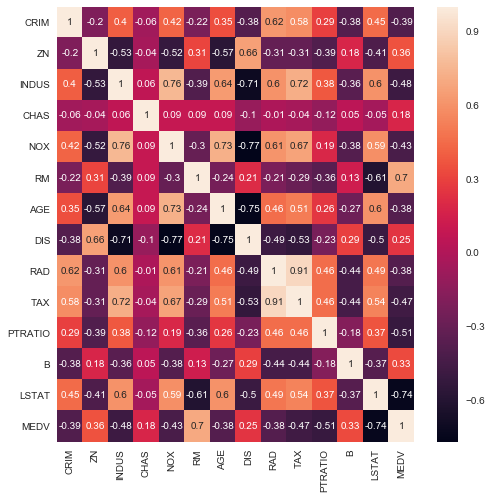

In [97]:
# Plot correlations between features
correlation_matrix = boston.corr().round(2)
plt.figure(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

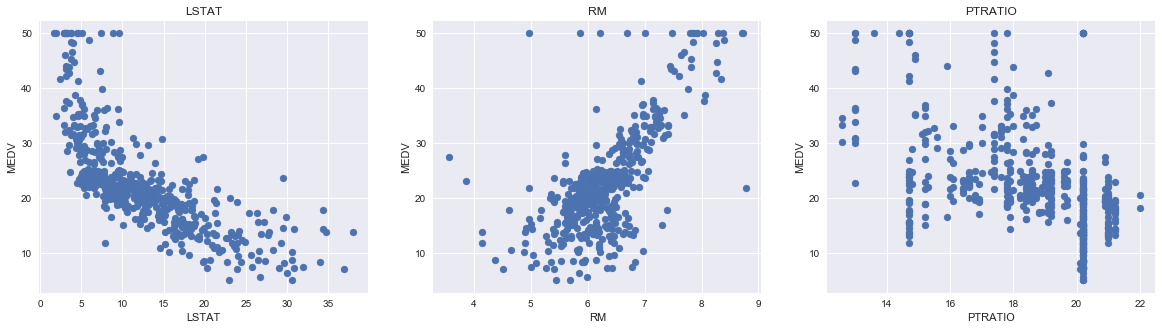

In [98]:
# Plot scatter plot of target vs features
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Split data into Train and Test sets

In [99]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = boston['MEDV']

In [100]:
# Split into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


# Train a model

In [103]:
# Train a regressor
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate model performance

In [102]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.30386319331
R2 score is 0.672521433566


The model performance for testing set
--------------------------------------
RMSE is 4.91393753476
R2 score is 0.691587828074


# Plot learning curves

https://github.com/crypdick/support-vector-machine-Boston-Housing-data/blob/master/boston_housing.ipynb

In [156]:
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
cv

ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)

In [159]:
train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

In [161]:
# Calculate the training and testing scores
sizes, train_scores, test_scores = learning_curve(lin_model, X, y, cv = cv, train_sizes = train_sizes, scoring = 'r2')

In [166]:
train_scores

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.77902807,  0.51989033,  0.74916679,  0.64548135,  0.63307038,
         0.70390912,  0.7146951 ,  0.81610671,  0.66893751,  0.80273435],
       [ 0.76859537,  0.67462944,  0.79779122,  0.66905176,  0.69896595,
         0.72398674,  0.70739979,  0.75076055,  0.73815208,  0.74370385],
       [ 0.7221517 ,  0.67420629,  0.78385912,  0.62242779,  0.69497088,
         0.70615274,  0.65350459,  0.71275309,  0.74959174,  0.64713875],
       [ 0.7254249 ,  0.70150168,  0.72996865,  0.62707181,  0.68141432,
         0.67589455,  0.69095689,  0.71195489,  0.67305777,  0.6859869 ],
       [ 0.73214639,  0.70171391,  0.7398613 ,  0.62132114,  0.69261545,
         0.69757407,  0.66135744,  0.71943428,  0.70451982,  0.6812121 ],
       [ 0.68539568,  0.70283787,  0.74324268,  0.62949676,  0.66454813,
         0.66086917,  0.64306748,  0.72581223

In [168]:
# Find the mean and standard deviation for each CV fold
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

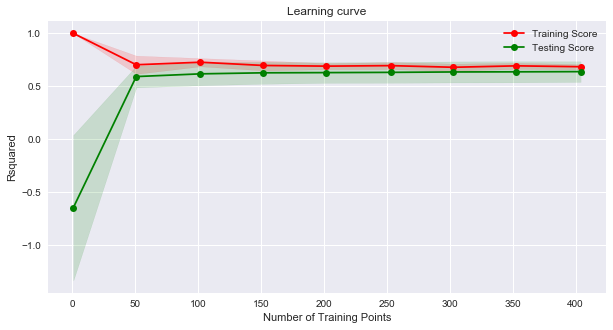

In [193]:
plt.figure(figsize=(10, 5))
plt.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
plt.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
plt.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
plt.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')

# Labels
plt.title('Learning curve')
plt.xlabel('Number of Training Points')
plt.ylabel('Rsquared')
#plt.xlim([0, X.shape[0]*0.8])
#plt.ylim([-0.05, 1.05])

# Visual aesthetics
plt.legend(loc='upper right')
?plt.tight_layout()